# Machine Learning Algorithms in more detail
This notebook will focus on Regression

### 1. Linear Regression

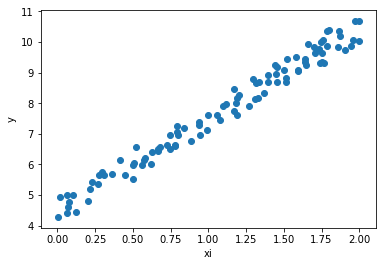

In [82]:
# Closed-form solution - usng MSE to optimize the error terms in training
# This method is called the Normal Equation

# Let's generate some linear data and test our Normal Equation
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt
plt.scatter(X, y)
plt.xlabel("xi")
plt.ylabel("y")
plt.show()

In [25]:
# Now let's compute the Normal Equation. 
# Compute the inverese of the matrix using NumPy's Linear Algera module (np.linalg)
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

print(theta_best)
print("That is close to our defined function, that had thetas of 4, and 3")

[[ 4.49478424]
 [ 2.99987679]]
That is close to our defined function, that had thetas of 4, and 3


In [26]:
# Now we can make predictions using our Normal Equation
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] #add x0 =1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[  4.49478424],
       [ 10.49453781]])

In [33]:
print("New x points to predict")
print(X_new)
print("\nNew points with 1 for each x0 instance. Included to allows theta_0 to multiple by 1")
print(X_new_b)
print("\nPredicted y points")
print(y_predict)

New x points to predict
[[0]
 [2]]

New points with 1 for each x0 instance. Included to allows theta_0 to multiple by 1
[[ 1.  0.]
 [ 1.  2.]]

Predicted y points
[[  4.49478424]
 [ 10.49453781]]


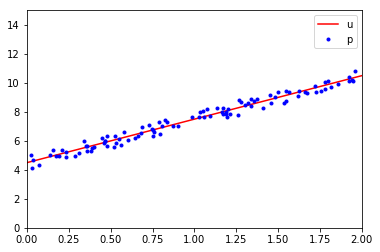

In [31]:
# Let's plot the model prediction
plt.plot(X_new, y_predict, "r-", label = "Predictions")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.legend("upper left")
plt.show()

In [38]:
# Alternate code using Sklearn
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print("Intercept, Coefficients")
print(lin_reg.intercept_, lin_reg.coef_)
print("\nPredictions")
print(lin_reg.predict(X_new))


Intercept, Coefficients
[ 4.49478424] [[ 2.99987679]]

Predictions
[[  4.49478424]
 [ 10.49453781]]


### Compuational Complexity
The Normal Equation method computes the inverse of Xt . X, which is an n by n matrix (where n is the number of features). The compuational complexity of inverting a such a matrix is approx. O(n^2.4) to O(n^3). So if you double the number of features (1 --> 2) the computational complexity is increased by 2^2.4 = 5.3.

### Gradient Descent
Gradient Descent is a very generic optimization algorithm. The general idea is to tweak parameters iteratively in order to minimize a cost function.

Gradient Descent measures the local grdient of the error function with regards to paramater vector theta, and goes in the direction of the descending gradient. Once the gradient is zero is stops.

It starts by filling theta with random values (random initilization), and then it gradually improves at each step. Each step attempting to decrease the cost function (i.e. MSE) untill the algorithm covergese to a minimum.

An important parameter in Gradient Descent is the step size, determined by the learning rate hyperparameter. If it's too small is take a long time to converge, however too big and it may step over the minimam, and can cause the algorithm to diverge.

Finally not all cost functions are nice convex functions, some contain local minimas, which can cause the algorithm to never find the global minimal depending on the random initilization. The MSE cost function however is convex and thus will always find  the global minimial with a reasonable learning rate. The scale of each feature can affect how long GD takes to find the minimal, and it's reccomended to have features on a similar scale.  

### Batch Gradient Descent
When using Gradient Descent we need to calculate the gradient of the cost function with regards to each model parameter theta (the paritial derivative) to determine which to change. To do this we calculate the gradient vector, which contains the partial derivatives of the cost function (one for each model parameter).

The gradients are calculated over the full training set, which is where the name Batch Gradient Descent comes from. It can be very slow when the data sets is large.


In [41]:
# Here's an example 
eta = 0.1 # the learning rate
n_iterations = 1000
m = 100

theta = np.random.rand(2, 1) # random initilization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - (eta * gradients)  
    
print("Model Paramters found using Gradient Descent")
print(theta)

Model Paramters found using Gradient Descent
[[ 4.49478424]
 [ 2.99987679]]


#### Determining the correct learning rate 
This can be difficult, and you don't want to set too many iternations if not needed. An approach is to introduce a tolerance. In which the algorithm will stop once the gradient vector becomes less than the tolerance. Even with a tolerance it can still take a while to find the optimal solution. It can take O(1/e) where is the tolerance.

### Stochastic Gradient Descent
The main problem with Batch Gradient Descent is the fact that it uses the whole training set to compute gradients at every step. At the opposite extreme Stochastic Gradient Descent just picks a random instance in the training set at every step and computes the gradients based only on that single instance. This makes it much faster, since it only has to manipulate a small amount of data. 

Using a single instance also makes this algorithm much less regular. Instead of gently decreasing towards the minima, it will bounce up and down, decreasing only on average. Overtime it will get very close to the minumum but will never find the optimal. 

The randomness of Stochastic Gradient Descent means it will it can jump out of a local minimum to find a global minimum. An approach to make SGD settle at the minima is to gradually reduce the learning rate, this process is called simulated annealing. A schedule function determines the learning rate at each iteration.

In [45]:
# Here's a simple example of SGD
n_epochs = 50
t0, t1, = 5, 50    # learning schedule hypterparameters 

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        
print(theta)

[[ 4.48463605]
 [ 3.00562683]]


In [49]:
# Here's how to do it using sklearn.
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter = 50, penalty = None, eta0 = 0.1)
sgd_reg.fit(X, y.ravel())

print(sgd_reg.intercept_)
print(sgd_reg.coef_)

[ 4.49038191]
[ 3.00021518]


### Mini-batch Gradient Descent

Instead of computing the gradients on the full training set or the on a single instance, Mini-batch Gradient Descent computes the gradients on small random sets of instances called mini-batches. The algorithms process is less erratic than SGD, and will get closer to the minimum than SGB. However it may find if harder to escape from a local minima.

### Polynomial Regression
You can use linear models to fit nonlinear data, a simple method is to add powers of each feature as a new feature, and then train a linear model on this extended set of features.

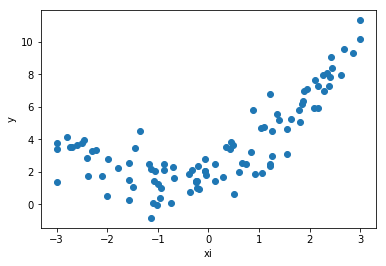

In [52]:
# Let's look at an example.

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.scatter(X, y)
plt.xlabel("xi")
plt.ylabel("y")
plt.show()

In [59]:
#Let's use sklearns polynomialFeature class to transform our training data, adding a square (2nd-degree polynomial) of 
# each feature as new features.
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias = False)
X_poly = poly_features.fit_transform(X)

print("Original feature - row 0")
print(X[0])
print("\nX_poly now contains the orginal feature of X, plus the square of this feature")
print(X_poly[0])

Original feature - row 0
[-1.56310758]

X_poly now contains the orginal feature of X, plus the square of this feature
[-1.56310758  2.44330531]


In [63]:
# Now let's fit a Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
y_pred = lin_reg.predict(X_poly)
lin_reg.intercept_, lin_reg.coef_

(array([ 1.92717805]), array([[ 1.08717158,  0.58803665]]))

In [64]:
y_pred[:5]

array([[ 1.66456498],
       [ 3.27171324],
       [ 2.70605953],
       [ 6.27170951],
       [ 8.00194428]])

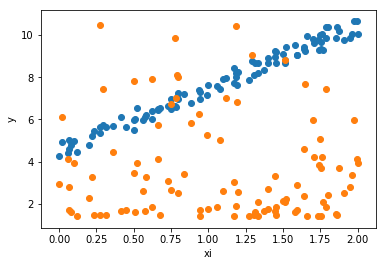

NameError: name 'save_fig' is not defined

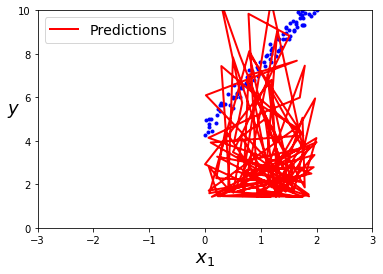

In [116]:
plt.scatter(X, y)
plt.scatter(X, y_pred, label = "Predictions")
#plt.legend(loc="upper left")
plt.xlabel("xi")
plt.ylabel("y")
plt.show()


### Learning Curves
These are plots curves of model performance on the training and validation set as a function of the training set size. To get these plots we train the model several times on different sized subsets of the training set.

In [108]:
# Here we define a function that plots the learning curves of a model given some training data.
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="validation")
    plt.legend(loc = "upper right", fontsize=14)
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)

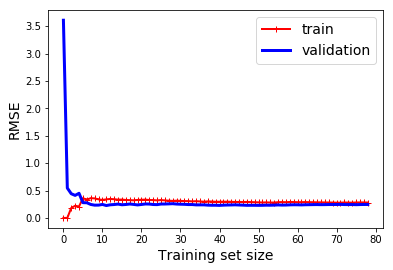

In [109]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

[0, 80, 0, 3]

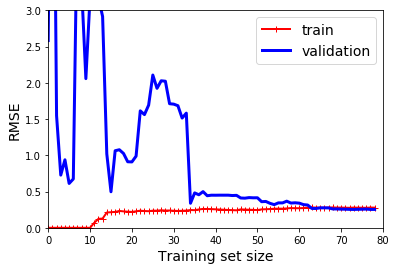

In [120]:
# Now let's look at the learning curves of a 10th-degree polynomial

from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])     
                      

### The Bias/Variance Tradeoff
A models generalization error can be expressed as the sum of three very different errors:

Bias: Generalization error due to wrong assumptions. i.e. assuming the data is linear when it is actually quadratic. A high-bias model is most likely to underfit the training data.

Variance: This due to the model's excessive sensitivity to small variations in the training data. A complex model is likely to have a a high variance, and thus overfit the training data.

Irreducible Error: Due to the noisiness of the data itself.

Increasing a model's complexity will typically increase its variance and reduce its bias. And reducing a model's complexity increases its bias and reduces its variance. This relationship is called the Bias-Variance Tradeoff.

### Regularized Linear Model

A simple method to reduce overfitting is to constrain the model. For example in Polynomial Regression we would reduce the number of polynomial degrees.

### Ridge Regression
Also called Tikhonov regularization is a regularized verion of Linear Regression. A regularization term equal to (alpha * Sum of theta) is added to the cost function. This forces the algorithm to not only fit the data, but also keep the model weights as small as possible. If alpha = 0, then the Ridge Regression is just Linear Regression, and if alpha is large then all the weights end up close to zero and results in a flat line through the data's mean.

In model develope the Regularizatioon term should only be added to the cost function during training, and once trained it should be evaulated using the unregularized performance measure.

When using Ridge Regression it's important to scale the data first.

In [126]:
# Let's perform Ridge Regresssion using Scikit_Learn using a closed-form solution  and then using stochastic gradient descent.

# closed-form solution
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X,y)
print("Closed-form solution:")
closed_form_sol = ridge_reg.predict([[1.5]])
print(closed_form_sol)

# stochastic gradient descent
sgd_reg = SGDRegressor(penalty="l2") # the penalty hyperparameter sets the type of regualization.
sgd_reg.fit(X, y.ravel())
print("\nStochastic Gradient Descent:")
sgd_sol = sgd_reg.predict([[1.5]])
print(sgd_sol)

Closed-form solution:
[[ 8.94711154]]

Stochastic Gradient Descent:
[ 8.86302635]


### Lasso Regression
Least Absolute Shrikage and Selection Operator Regression (Lasso Regression) is another regularized version of Linear Regression. It adds a regularization term to the cost function, but it uses l1 norm of the weight vector instead of half the square of l2 norm.

Lasso Regression aims to completely eliminate the weights of the least important features. In other words is automatically performs feature selection and outputs a sparse model (i.e. with few nonzero feature weights).

In [129]:
# Here's a small example using the sklearn Lasson class.
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([ 8.86078515])

### Elastic Net
Elastic Net is the middle ground between Ridge Regression and Lasso Regression. The regularization term is a simple mix of both Ridge and Lasso regularization terms, that can be controlled by a mix ratio r. When r=0, Elastic Net is equivalent to Ridge Regression, and when r=1, it is equivalent to Lasso Regrssion.

When should you use which regularization:

Ridge is a good defualt, but if you suspect that  only a few features are useful you should try Lasso or Elastic Net. Elastic Net is usually preferred over Lasso as Lasso can behave erratically when the number of features is greater than the number of training instances, or when several features are strongly correlated.


In [130]:
# Here's an example of Elastic Net
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([ 8.77184756])

### Early Stopping

A different approach to regularize learning algorithms is to stop training as soon as the validation error reaches its minmimum.

In [137]:
from sklearn.preprocessing import StandardScaler

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1,
                       penalty=None,
                       eta0=0.0005,
                       warm_start=True,
                       learning_rate="constant",
                       random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
#save_fig("early_stopping_plot")
plt.show()

TypeError: __init__() got an unexpected keyword argument 'max_iter'

In [138]:
# Here is a simple example
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

# prepare data
poly_scaler = Pipeline([
        ("poly_feature", PolynomialFeatures(degree=90, include_bias = False)),
        ("std_scaler", StandardScaler()),
    ])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(n_iter=1, warm_start=True, penalty=None,
                      learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)   #warmstart ensures it continues training where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val_predict, y_val)
    if val_error < minimum_val_error:      # store best model results here
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

In [148]:
print("Best Model outputs")
print("Validation Errror", minimum_val_error)
print("\nBest epoch and Model")
best_epoch, best_model

Best Model outputs
Validation Errror 1.29586685259

Best epoch and Model


(0, SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
        fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
        loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
        random_state=None, shuffle=True, verbose=0, warm_start=True))

### Logistic Regression
Logistic Regression also called logit regression is commonly used for classifications. If the probability output is greater than 50% then the model predicts the postive class, else the negative class.

Similar to linear reggresion a logistic regression model computes a weighted sum of the input features (plus a bias term), but instead of outputting the result directly it outputs the logistic of this result.

The logistic (or logit) is a sigmoid function (i.e. S-shaped) that outputs a number between 0 and 1. Once the model has estimated the probability it makes a prediction using a threshold of 0.5

### Training and Cost Function
Logistic Regression is trained to estimate high probabilities for postive instances and low probabilities for negative instances. 

This model uses a special cost function called the log loss. It's a stepwise function, that outputs a high cost if the model estimates a probability close to zero for positive instances, and also a cost high if it outputs probability close to 1 for a negative instance. The cost function over the entire training set is just the average cost over all training instances.

The cost fuction doesn't have closed-form equation, however the function is convex so gradient descent is guaranteed to find the global minimum.

In [156]:
# Let's try it now on the iris dataset
from sklearn import datasets
iris = datasets.load_iris()
print(iris.DESCR)

list(iris.keys())

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

['DESCR', 'feature_names', 'target_names', 'data', 'target']

In [153]:
X_all = iris["data"]
X = X_all[:, 3:] # petal width
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris-Virginica, else 0

print(X[:5])
print(y[:5])

[[ 0.2]
 [ 0.2]
 [ 0.2]
 [ 0.2]
 [ 0.2]]
[0 0 0 0 0]


In [155]:
# Now let's train a Logistic Regression
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

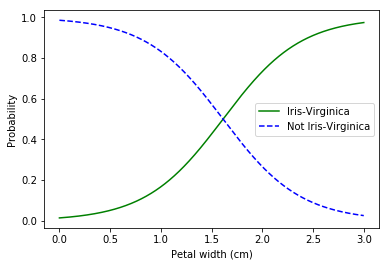

In [162]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")
plt.legend()
plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")

In [163]:
## make predictions
log_reg.predict([[1.7], [1.5]])

array([1, 0])

### Softmax Regression
Logistic Regression can be generalized to work with multiple classes directly, without having to train multipe binary classifiers. This called Softmax Regression or Multinomial Logistic Regression.

This works by first computing a score for each class k, and then estimates the probability of each class by applying the softmax functions (also known as the normalizied exponential) to the scores.